# Abgabe 2: Klassische Mechanik 2

**Teammitglieder:** René Zarwel, Michael Wimmer, Matthias Kastenmüller

In [1]:
from matplotlib import pyplot as plt
import numpy as np
from numpy import array, polyval, polyfit
import vpython as vp         # get VPython modules for animation
vec=vp.vector

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Aufgabe 1: Umlaufzeit

`<INSERT DESCRIPTION HERE>`

C=17.046411581708377 und n=1.508036297446902
Für den Wert T=6.2 ergibt sich ein r=0.5113672986808556


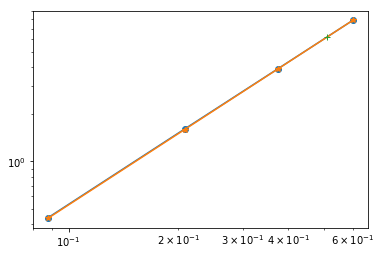

In [2]:
# Gegebene Funktion & Umgestellt nach r
T = lambda r,C,n: C*r**n
r = lambda T,C,n: (T/C)**(1/n)

# Eingangsdaten
Tdata = array([0.44, 1.61, 3.88, 7.89])
rdata = array([0.088, 0.208, 0.374, 0.600])

plt.loglog(rdata, Tdata, 'o-')

# Logarithmieren der Eingangsdaten
TdataLog = np.log(Tdata)
rdataLog = np.log(rdata)

# Lösen durch Geradengleichung
n = (TdataLog[0]-TdataLog[1])/(rdataLog[0]-rdataLog[1])
C = Tdata[3]/rdata[3]**n
print("C=" + str(C) + " und n=" + str(n))
plt.loglog(rdata, T(rdata,C,n), '*-')

# Berechnung des fehlenden Wertes
Tmiss = 6.20
rmiss = r(6.2,C,n)
print("Für den Wert T=" + str(Tmiss) + " ergibt sich ein r=" + str(rmiss))
plt.loglog(rmiss, Tmiss, '+')

## Aufgabe 6: Drei Sterne

Auf den Stern 1 wirkt die Anziehungskraft von Stern 2 und Stern 3. Zusammen ergeben sie die auf den Stern 1 wirkende Kraft:

$$
\vec{F_1} = m_1 \cdot \ddot{r} = \vec{F_{12}} + \vec{F_{13}}
$$

Damit kann jede wirkende Anziehungskraft separat betrachtet werden. Durch einsetzen der jeweils wirkenden Anziehungskraft ergibt sich folgende Gleichung:

$$
m_1 \cdot \ddot{r} = G\frac{m_2 \cdot m_1}{r_{12}^3}\vec{r_{12}} + G\frac{m_3 \cdot m_1}{r_{13}^3}\vec{r_{13}}
$$

Da $m_1$ auf der rechten Seite ausgeklammert werden kann und somit auf beiden Seiten gleichermaßen vorkommt, kann es aufgehoben werden. Desweiteren ersetzen wir die Richtungsvektoren $\vec{r_{12}}$ und $\vec{r_{13}}$ durch die Berechnung aus den Positionsvektoren. Gleichermaßen wird mit den im Nenner vorhandenen Längen der Richtungsvektoren verfahren. Somit ergibt sich die gegebene Gleichung:

$$
\ddot{\vec{r_1}} = Gm_2\frac{\vec{r_2}-\vec{r_1}}{|\vec{r_2}-\vec{r_1}|^3}+Gm_3\frac{\vec{r_3}-\vec{r_1}}{|\vec{r_3}-\vec{r_1}|^3}
$$

Allgemein kann die Gleichung auch folgendermaßen fomuliert werden:

$$
\ddot{\vec{r_1}} = G \displaystyle\sum_{i=2}^{n} m_i\frac{\vec{r_i}-\vec{r_1}}{|\vec{r_i}-\vec{r_1}|^3} \\
n = \text{ Anzahl der Sterne}
$$

Dies kann auf die anderen Sterne übertragen werden und somit ergeben sich für Stern 2 und 3 folgende Bewegungsgleichungen:

$$
\ddot{\vec{r_2}} = Gm_1\frac{\vec{r_1}-\vec{r_2}}{|\vec{r_1}-\vec{r_2}|^3}+Gm_3\frac{\vec{r_3}-\vec{r_2}}{|\vec{r_3}-\vec{r_2}|^3} \\
\ddot{\vec{r_3}} = Gm_1\frac{\vec{r_1}-\vec{r_3}}{|\vec{r_1}-\vec{r_3}|^3}+Gm_2\frac{\vec{r_2}-\vec{r_3}}{|\vec{r_2}-\vec{r_3}|^3}
$$

### Plot der Bewegung

Im folgenden wird die Bewegung der 3 Sterne für 10 Sekunden berechnet und im Breich von -4 bis 4 für x und y geplottet.

(-4, 4)

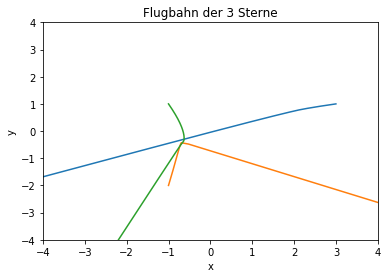

In [3]:
def leapfrog(lfdiffeq, r1, v1, r2, r3, h):       # vectorized leapfrog
    """ vector leapfrog method using numpy arrays.
        It solves general (r,v) ODEs as: 
        dr[i]/dt = f[i](v), and dv[i]/dt = g[i](r).
        User supplied lfdiffeq(id, r, v, t) returns
        f[i](r) if id=0, or g[i](v) if id=1.
        It must return a numpy array if i>1 """
    hh = h/2.0
    r11 = r1 + hh*lfdiffeq(0, r1, r2, r3, v1)     # 1st: r at h/2 using v0    @\lbl{line:lf1}@
    v11 = v1 +  h*lfdiffeq(1, r11, r2, r3, v1)  # 2nd: v1 using a(r) at h/2 @\lbl{line:lf2}@
    r11 = r11 + hh*lfdiffeq(0, r1, r2, r3, v11)   # 3rd: r1 at h using v1     @\lbl{line:lf3}@
    return r11, v11
  
     
def star(id, r1, r2, r3, v):            # return the eqns of motion
    if (id == 0): return v         # velocity, dr/dt
    r12 = r2 - r1
    r13 = r3 - r1
    s12 = vp.mag(vec(r12[0],r12[1],0))   # $s=|\vec{r}|$
    s13 = vp.mag(vec(r13[0],r13[1],0))   # $s=|\vec{r}|$
    return m2*r12/(s12*s12*s12) + m3*r13/(s13*s13*s13)         # accel dv/dt, faster than s**3  

# Startpositions
r1 = [np.array([3.0, 1.0])] 
v1 = np.array([0.0, 0.0]) 
r2 = [np.array([-1.0, -2.0])] 
v2 = np.array([0.0, 0.0]) 
r3 = [np.array([-1.0, 1.0])] 
v3 = np.array([0.0, 0.0])
m1 = 150
m2 = 200
m3 = 250
t, h = 0.0, 0.001

while t < 10:
    r1_tmp, v1 = leapfrog(star, r1[-1], v1, r2[-1], r3[-1], h)  # integrate 
    r1.append(r1_tmp)
    r2_tmp, v2 = leapfrog(star, r2[-1], v2, r1[-1], r3[-1], h)  # integrate 
    r2.append(r2_tmp)
    r3_tmp, v3 = leapfrog(star, r3[-1], v3, r1[-1], r2[-1], h)  # integrate 
    r3.append(r3_tmp)
    t += h
    
plt.title('Flugbahn der 3 Sterne')
plt.ylabel('y')
plt.xlabel('x')
plt.plot([v[0] for v in r1], [v[1] for v in r1])
plt.plot([v[0] for v in r2], [v[1] for v in r2])
plt.plot([v[0] for v in r3], [v[1] for v in r3])
axes = plt.gca()
axes.set_xlim([-4,4])
axes.set_ylim([-4,4])

Man sieht, das die 3 Sterne sich zunächst gegenseitig anziehen und aufeinander zufliegen. Anschließend werden sie durch die hohe Anziehungskraft in der Nähe der jeweils anderen Sterne voneinander schnell weggedrängt. Dieses Verhalten wird in der Raumfahrt auch genutzt und nennt sich Swing-By.

Diese Bewegung wird im folgenden als Animation dargestellt.

In [4]:
# draw the scene              
scene = vp.canvas(title='Planetary motion',          # scene start 
                   background=vec(.2,.5,1), forward=vec(0,2,-1))
star1 = vp.sphere(pos=vec(r1[0][0],r1[0][1],0), radius=0.1, make_trail=True, up=vec(0,0,1))
star2 = vp.sphere(pos=vec(r2[0][0],r2[0][1],0), radius=0.1, make_trail=True, up=vec(0,0,1))
star3 = vp.sphere(pos=vec(r3[0][0],r3[0][1],0), radius=0.1, make_trail=True, up=vec(0,0,1))
sunlight = vp.local_light(pos=vec(0,0,0), color=vp.color.yellow) #scn end 

for i in range(len(r1)):
    r12 = r2[i] - r1[i]
    r13 = r3[i] - r1[i]
    limiter = np.minimum(vp.mag(vec(r12[0],r12[1],0)), vp.mag(vec(r13[0],r13[1],0)))
    vp.rate(100/limiter)   # limit animation speed

    star1.pos = vec(r1[i][0],r1[i][1],0)           # move planet  
    star2.pos = vec(r2[i][0],r2[i][1],0)           # move planet  
    star3.pos = vec(r3[i][0],r3[i][1],0)           # move planet  

        

<IPython.core.display.Javascript object>

KeyboardInterrupt: 